# Regression Case Study: Zomato Restaurant rating prediction

Problem Statement: Predict the rating of a restaurant based on its features
* Target Variable: Rating
* Predictor Variables: Pricing, services, cuisines, location etc.

### Exploring the data

In [1]:
# Reading the dataset
import pandas as pd
import numpy as np
ZomatoData=pd.read_csv('ZomatoData.csv', encoding='latin')
print('Shape before deleting duplicate values:', ZomatoData.shape)

# Removing duplicate rows if any
ZomatoData=ZomatoData.drop_duplicates()
print('Shape After deleting duplicate values:', ZomatoData.shape)

ZomatoData.head()
# Start observing the Quantitative/Categorical/Qualitative variables

Shape before deleting duplicate values: (9551, 19)
Shape After deleting duplicate values: (9551, 19)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8


In [2]:
ZomatoData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [3]:
ZomatoData.nunique()

Restaurant ID           9551
Restaurant Name         7446
Country Code              15
City                     141
Address                 8918
Locality                1208
Locality Verbose        1265
Longitude               8120
Latitude                8677
Cuisines                1825
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Votes                   1012
Average Cost for two     140
Rating                    33
dtype: int64

In [4]:
ZomatoData.describe(include='all')

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating
count,9.551000e+03,9551,9551.000000,9551,9551,9551,9551,9551.000000,9551.000000,9542,9551,9551,9551,9551,9551,9551.000000,9551.000000,9551.000000,9551.000000
unique,NaN,7446,NaN,141,8918,1208,1265,NaN,NaN,1825,12,2,2,2,1,NaN,NaN,NaN,NaN
top,NaN,Cafe Coffee Day,NaN,New Delhi,"Sector 41, Noida",Connaught Place,"Connaught Place, New Delhi",NaN,NaN,North Indian,Indian Rupees(Rs.),No,No,No,No,NaN,NaN,NaN,NaN
freq,NaN,83,NaN,5473,11,122,122,NaN,NaN,936,8652,8393,7100,9517,9551,NaN,NaN,NaN,NaN
mean,9.051128e+06,NaN,18.365616,NaN,NaN,NaN,NaN,64.126574,25.854381,NaN,NaN,NaN,NaN,NaN,NaN,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,NaN,56.750546,NaN,NaN,NaN,NaN,41.467058,11.007935,NaN,NaN,NaN,NaN,NaN,NaN,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,NaN,1.000000,NaN,NaN,NaN,NaN,-157.948486,-41.330428,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,NaN,1.000000,NaN,NaN,NaN,NaN,77.081343,28.478713,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,NaN,1.000000,NaN,NaN,NaN,NaN,77.191964,28.570469,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,NaN,1.000000,NaN,NaN,NaN,NaN,77.282006,28.642758,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,131.000000,700.000000,3.700000


In [5]:
ZomatoData.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Price range,Votes,Average Cost for two,Rating
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1.804837,156.909748,1199.210763,2.891268
std,8.791521e+06,56.750546,41.467058,11.007935,0.905609,430.169145,16121.183073,1.128845
min,5.300000e+01,1.000000,-157.948486,-41.330428,1.000000,0.000000,0.000000,1.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,1.000000,5.000000,250.000000,2.500000
50%,6.004089e+06,1.000000,77.191964,28.570469,2.000000,31.000000,400.000000,3.200000
75%,1.835229e+07,1.000000,77.282006,28.642758,2.000000,131.000000,700.000000,3.700000
max,1.850065e+07,216.000000,174.832089,55.976980,4.000000,10934.000000,800000.000000,4.900000


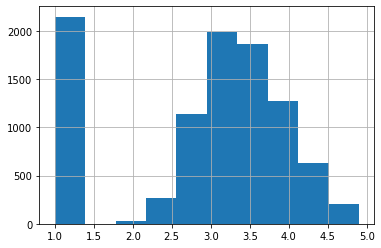

In [6]:
# Is my target variable has good enough distribution?
%matplotlib inline
ZomatoData['Rating'].hist()

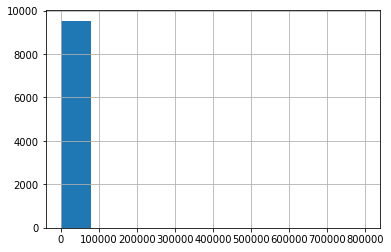

In [7]:
ZomatoData['Average Cost for two'].hist()

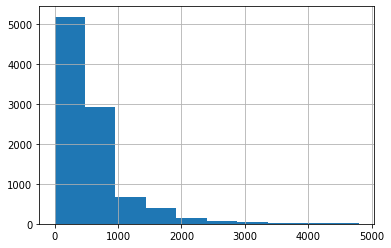

In [8]:
Filter=ZomatoData['Average Cost for two']<5000
ZomatoData[Filter]['Average Cost for two'].hist()

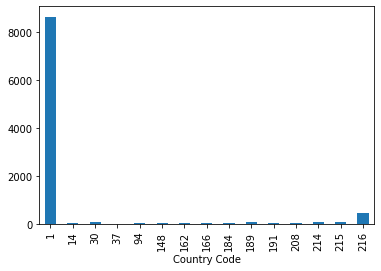

In [9]:
# Looking at the distribution of Country code
groupedData=ZomatoData.groupby('Country Code').size()
groupedData.plot.bar()

In [10]:
# Creating a new feature to try country code
# by grouping all other country codes as single entity and country code-1 as another
ZomatoData['Country Code'][ZomatoData['Country Code']!=1]=2

C:\Users\Vasanth\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


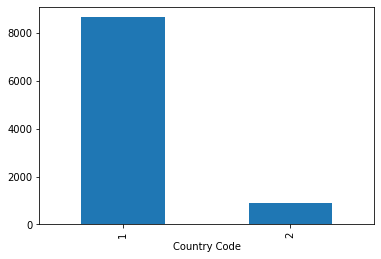

In [11]:
groupedData=ZomatoData.groupby('Country Code').size()
groupedData.plot.bar()

In [12]:
groupedData

Country Code
1    8652
2     899
dtype: int64

C:\Users\Vasanth\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Vasanth\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 140 missing from current font.
  font.set_text(s, 0, flags=flags)


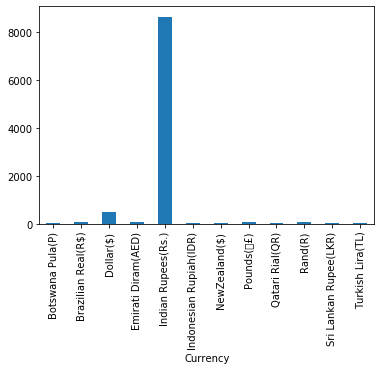

In [13]:
# Looking at the distribution of 
groupedData=ZomatoData.groupby('Currency').size()
groupedData.plot.bar()

In [14]:
# Finding out how many number of cusines are offered by every restaurant
len(ZomatoData['Cuisines'].values[0].split(','))

3

In [15]:
def cursinecount(a): 
    b=str(a).split(',') 
    return len(b)

In [16]:
ZomatoData['No_Of_Cuisines']=ZomatoData['Cuisines'].apply(cursinecount)
ZomatoData.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Votes,Average Cost for two,Rating,No_Of_Cuisines
0,6317637,Le Petit Souffle,2,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",Botswana Pula(P),Yes,No,No,No,3,314,1100,4.8,3
1,6304287,Izakaya Kikufuji,2,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,Botswana Pula(P),Yes,No,No,No,3,591,1200,4.5,1
2,6300002,Heat - Edsa Shangri-La,2,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",Botswana Pula(P),Yes,No,No,No,4,270,4000,4.4,4
3,6318506,Ooma,2,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",Botswana Pula(P),No,No,No,No,4,365,1500,4.9,2
4,6314302,Sambo Kojin,2,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",Botswana Pula(P),Yes,No,No,No,4,229,1500,4.8,2


## Remove the garbage columns
Qualitative, ID kind of columns, original dates etc

In [17]:
BadColumns=['Restaurant ID', 'Restaurant Name', 'City', 'Address', 'Locality Verbose',
           'Locality', 'Cuisines', 'Currency', 'Switch to order menu', ]
# Drop bad columns from the data
ZomatoData.drop(BadColumns, axis=1, inplace=True)
ZomatoData.head()

,Country Code,Longitude,Latitude,Has Table booking,Has Online delivery,Is delivering now,Price range,Votes,Average Cost for two,Rating,No_Of_Cuisines
0,2,121.027535,14.565443,Yes,No,No,3,314,1100,4.8,3
1,2,121.014101,14.553708,Yes,No,No,3,591,1200,4.5,1
2,2,121.056831,14.581404,Yes,No,No,4,270,4000,4.4,4
3,2,121.056475,14.585318,No,No,No,4,365,1500,4.9,2
4,2,121.057508,14.584450,Yes,No,No,4,229,1500,4.8,2


In [18]:
# Measure the correlation of all the predictors with the target variable
ZomatoData.corr()

,Country Code,Longitude,Latitude,Price range,Votes,Average Cost for two,Rating,No_Of_Cuisines
Country Code,1.000000,-0.653165,-0.159595,0.284869,0.142058,0.110817,0.331771,0.002928
Longitude,-0.653165,1.000000,0.043207,-0.078939,-0.085101,0.045891,-0.145930,0.014827
Latitude,-0.159595,0.043207,1.000000,-0.166688,-0.022962,-0.111088,-0.019806,-0.029014
Price range,0.284869,-0.078939,-0.166688,1.000000,0.309444,0.075083,0.462939,0.312938
Votes,0.142058,-0.085101,-0.022962,0.309444,1.000000,0.067783,0.349105,0.183431
Average Cost for two,0.110817,0.045891,-0.111088,0.075083,0.067783,1.000000,0.058957,0.013342
Rating,0.331771,-0.145930,-0.019806,0.462939,0.349105,0.058957,1.000000,0.250821
No_Of_Cuisines,0.002928,0.014827,-0.029014,0.312938,0.183431,0.013342,0.250821,1.000000


In [19]:
# Run the anova function for all categorical columns
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [20]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Country Code', 'Has Table booking', 'Has Online delivery', 
                    'Is delivering now','Price range']
FunctionAnova(inpData=ZomatoData, TargetVariable='Rating', CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Country Code is correlated with Rating | P-Value: 3.8537843967916784e-244
Has Table booking is correlated with Rating | P-Value: 3.9393041304297214e-82
Has Online delivery is correlated with Rating | P-Value: 1.6952587420575958e-92
Is delivering now is NOT correlated with Rating | P-Value: 0.13200822438738005
Price range is correlated with Rating | P-Value: 0.0


['Country Code', 'Has Table booking', 'Has Online delivery', 'Price range']

In [21]:
SelectedCols=['No_Of_Cuisines','Votes','Average Cost for two','Country Code', 'Has Table booking', 'Has Online delivery', 'Price range','Rating']
DataforML=ZomatoData[SelectedCols]
DataforML.head()

,No_Of_Cuisines,Votes,Average Cost for two,Country Code,Has Table booking,Has Online delivery,Price range,Rating
0,3,314,1100,2,Yes,No,3,4.8
1,1,591,1200,2,Yes,No,3,4.5
2,4,270,4000,2,Yes,No,4,4.4
3,2,365,1500,2,No,No,4,4.9
4,2,229,1500,2,Yes,No,4,4.8


In [22]:
DataforML['Has Table booking'].replace({'Yes':1,'No':0}, inplace=True)
DataforML['Has Online delivery'].replace({'Yes':1,'No':0}, inplace=True)
DataforML.head()

C:\Users\Vasanth\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,No_Of_Cuisines,Votes,Average Cost for two,Country Code,Has Table booking,Has Online delivery,Price range,Rating
0,3,314,1100,2,1,0,3,4.8
1,1,591,1200,2,1,0,3,4.5
2,4,270,4000,2,1,0,4,4.4
3,2,365,1500,2,0,0,4,4.9
4,2,229,1500,2,1,0,4,4.8


In [23]:
DataforML.columns

Index(['No_Of_Cuisines', 'Votes', 'Average Cost for two', 'Country Code',
       'Has Table booking', 'Has Online delivery', 'Price range', 'Rating'],
      dtype='object')

## Splitting the data in training and testing

In [24]:
# Separate Target Variable and Predictor Variables
TargetVariable='Rating'
Predictors=['No_Of_Cuisines', 'Votes', 'Average Cost for two', 'Country Code',
       'Has Table booking', 'Has Online delivery', 'Price range']
X=DataforML[Predictors].values
y=DataforML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [25]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7640, 7)
(7640,)
(1911, 7)
(1911,)


## Trying multiple Supervised ML models

## Random Forest

RandomForestRegressor(max_depth=2, n_estimators=400)
R2 Value: 0.8784924591048265
Accuracy 91.99305061297581


,No_Of_Cuisines,Votes,Average Cost for two,Country Code,Has Table booking,Has Online delivery,Price range,Rating,PredictedRating
0,2,1333,400,1,0,0,1,3.7,4.0
1,2,2424,270,2,0,0,3,4.7,4.0
2,1,25,500,1,0,0,2,3.4,3.0
3,2,0,300,1,0,0,1,1.0,1.0
4,2,29,100,1,0,1,1,3.1,3.0


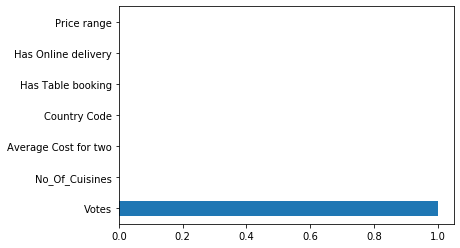

In [26]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=2, n_estimators=400,criterion='mse')

# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

## Adaboost

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5),
                  learning_rate=0.04, n_estimators=500)
R2 Value: 0.9078643479700353
Accuracy 93.05680477145908


,No_Of_Cuisines,Votes,Average Cost for two,Country Code,Has Table booking,Has Online delivery,Price range,Rating,PredictedRating
0,2,1333,400,1,0,0,1,3.7,4.0
1,2,2424,270,2,0,0,3,4.7,4.0
2,1,25,500,1,0,0,2,3.4,3.0
3,2,0,300,1,0,0,1,1.0,1.0
4,2,29,100,1,0,1,1,3.1,3.0


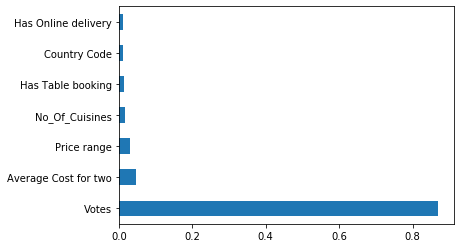

In [27]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 1 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=5)
RegModel = AdaBoostRegressor(n_estimators=500, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

## XGBoost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=2,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
[23:31:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[23:31:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror

,No_Of_Cuisines,Votes,Average Cost for two,Country Code,Has Table booking,Has Online delivery,Price range,Rating,PredictedRating
0,2,1333,400,1,0,0,1,3.7,4.0
1,2,2424,270,2,0,0,3,4.7,5.0
2,1,25,500,1,0,0,2,3.4,3.0
3,2,0,300,1,0,0,1,1.0,1.0
4,2,29,100,1,0,1,1,3.1,3.0


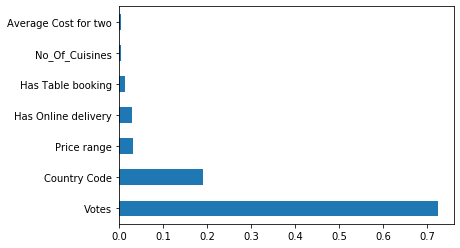

In [28]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2, learning_rate=0.1, n_estimators=1000, objective='reg:linear', booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((y_test - prediction) / y_test)) * 100))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
TestingDataResults.head()

# Saving the model

In [30]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final ZomatoRatingModel
with open('FinalXGBoostModel.pkl', 'wb') as fileWriteStream:
    pickle.dump(XGB, fileWriteStream)
    # Don't forget toa close the filestream!
    fileWriteStream.close()

# Reading the model

In [61]:
import pickle
with open('FinalXGBoostModel.pkl', 'rb') as fileReadStream:
    XGBoost_model=pickle.load(fileReadStream)
    # Don't forget to close the filestream!
    fileReadStream.close()

[00:23:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [35]:
DataforML.head()

,No_Of_Cuisines,Votes,Average Cost for two,Country Code,Has Table booking,Has Online delivery,Price range,Rating
0,3,314,1100,2,1,0,3,4.8
1,1,591,1200,2,1,0,3,4.5
2,4,270,4000,2,1,0,4,4.4
3,2,365,1500,2,0,0,4,4.9
4,2,229,1500,2,1,0,4,4.8


In [63]:
from tkinter import *
from tkinter import ttk
import random
import numpy
import pandas as pd
root = Tk()
root.title('Zomato Rating Prediction')
root.geometry('850x650')
root.configure(background="#E5E8E8")
var = StringVar()
label = Label( root, textvariable = var,font=('arial',20,'bold'),bd=20,background="#E5E8E8")
var.set('Zomato Rating Prediction')
label.grid(row=0,columnspan=6)

#########################################################################################
label_1 = ttk.Label(root, text ='No_Of_Cusines',font=("Helvetica", 16),background="#E5E8E8")
label_1.grid(row=11,column=0)
    
cusines= StringVar(root)

# Dictionary with options
cusinesChoices = {3, 1, 4, 2, 5, 6, 7, 8}
cusines.set(1) # set the default option
popupMenu = OptionMenu(root,cusines, *cusinesChoices)
popupMenu.grid(row = 11, column = 1)

# on change dropdown value
def change_dropdown(*args):
    print( cusines.get() )

# link function to change dropdown
cusines.trace('w', change_dropdown)



######################################################################

#VOTES

label_2= ttk.Label(root, text ='Votes',font=("Helvetica", 16),background="#E5E8E8")
label_2.grid(row=12,column=0)


votes= Entry(root)
votes.grid(row=12,column=1)
    
    
    
#############################################################   
    
    
    
#AVERAGE COST FOR TWO
    
label_3 = ttk.Label(root, text ='Average Cost For Two',font=("Helvetica", 16),background="#E5E8E8")
label_3.grid(row=13,column=0)


avgcost= Entry(root)
avgcost.grid(row=13,column=1)



################################################################


#CountryCode

label_4 = ttk.Label(root, text ='CountryCode',font=("Helvetica", 16),background="#E5E8E8")
label_4.grid(row=14,column=0)
    
cc= StringVar(root)

# Dictionary with options
ccChoices = {2, 1}
cc.set(1) # set the default option
popupMenu = OptionMenu(root,cc, *ccChoices)
popupMenu.grid(row = 14, column = 1)

# on change dropdown value
def change_dropdown(*args):
    print( cc.get() )

# link function to change dropdown
cc.trace('w', change_dropdown)


####################################################    


################################################################


#Has Table booking

label_5 = ttk.Label(root, text ='HasTableBooking',font=("Helvetica", 16),background="#E5E8E8")
label_5.grid(row=15,column=0)
    
htb= StringVar(root)

# Dictionary with options
htbChoices = {'Yes','No'}
htb.set('Yes') # set the default option
popupMenu = OptionMenu(root,htb, *htbChoices)
popupMenu.grid(row = 15, column = 1)

# on change dropdown value
def change_dropdown(*args):
    print( htb.get() )

# link function to change dropdown
htb.trace('w', change_dropdown)


####################################################  


################################################################


#Has Online delivery

label_6 = ttk.Label(root, text ='HasOnlineDelivery',font=("Helvetica", 16),background="#E5E8E8")
label_6.grid(row=16,column=0)
    
hod= StringVar(root)

# Dictionary with options
hodChoices = {'Yes','No'}
hod.set('Yes') # set the default option
popupMenu = OptionMenu(root,hod, *hodChoices)
popupMenu.grid(row = 16, column = 1)

# on change dropdown value
def change_dropdown(*args):
    print( hod.get() )

# link function to change dropdown
hod.trace('w', change_dropdown)


####################################################  


################################################################


#Price range

label_7 = ttk.Label(root, text ='Price range',font=("Helvetica", 16),background="#E5E8E8")
label_7.grid(row=17,column=0)
    
pr= StringVar(root)

# Dictionary with options
prChoices = {3, 4, 2, 1}
pr.set(1) # set the default option
popupMenu = OptionMenu(root,pr, *prChoices)
popupMenu.grid(row = 17, column = 1)

# on change dropdown value
def change_dropdown(*args):
    print( pr.get() )

# link function to change dropdown
pr.trace('w', change_dropdown)


####################################################  
    




def predict():
    
    label_out = ttk.Label(root, text ='           ',font=("Helvetica", 18),background="#E5E8E8")
    label_out.grid(row=21,column=1)
    
    
    dict1={'Yes':1,'No':0}
    
    NOC=cusines.get()
    VOTES=votes.get()
    AVGCOST=avgcost.get()
    COUNTRYCODE=cc.get()
    HASTABLEBOOKING=dict1[htb.get()]
    HASONLINEDELIVERY=dict1[hod.get()]
    PRICERANGE=pr.get()
    
    list=[[NOC,VOTES,AVGCOST,COUNTRYCODE,HASTABLEBOOKING,HASONLINEDELIVERY,PRICERANGE]]
    predicted=XGBoost_model.predict(numpy.array(list))

    
    label_out = ttk.Label(root, text =str(round(predicted[0],1)),font=("Helvetica", 18),background="#E5E8E8")
    label_out.grid(row=21,column=1)
    

    
    
b1 = Button(root, text = 'Predict',font=("Helvetica", 16),background="white",command = predict)
b1.grid(row=21,column=0)


    
root.mainloop()